In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.datasets import load_breast_cancer

## K-Nearest Neighbour Classifier

In [2]:
X, y = mglearn.datasets.make_forge()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'second feature')

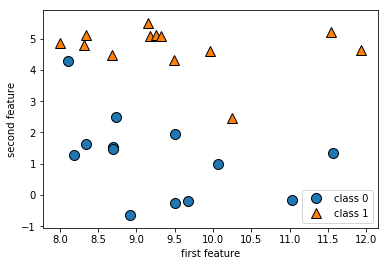

In [3]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0', 'class 1'])
plt.xlabel('first feature')
plt.ylabel('second feature')

In [4]:
X.shape

(26, 2)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


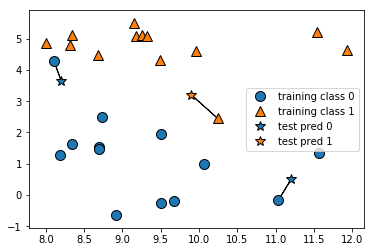

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


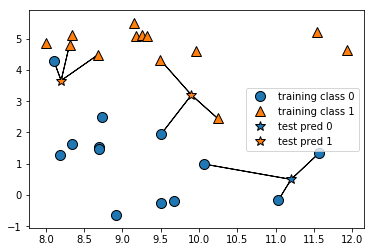

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,Y_train)
print(clf.score(X_test, Y_test))

0.8571428571428571


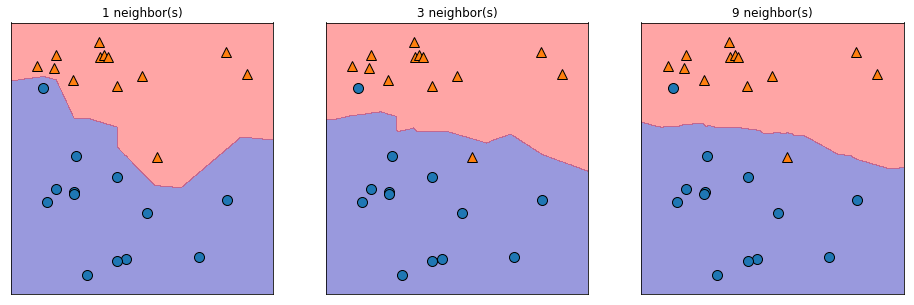

In [8]:
fig, axes = plt.subplots(1,3,figsize=(16,5))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))


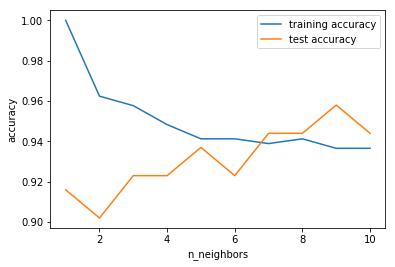

In [9]:
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state=0)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,Y_train)
    training_accuracy.append(clf.score(X_train,Y_train))
    test_accuracy.append(clf.score(X_test,Y_test))
    
plt.plot(neighbors_settings,training_accuracy, label='training accuracy')
plt.plot(neighbors_settings,test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

## K-Nearest Neighbours Regressor

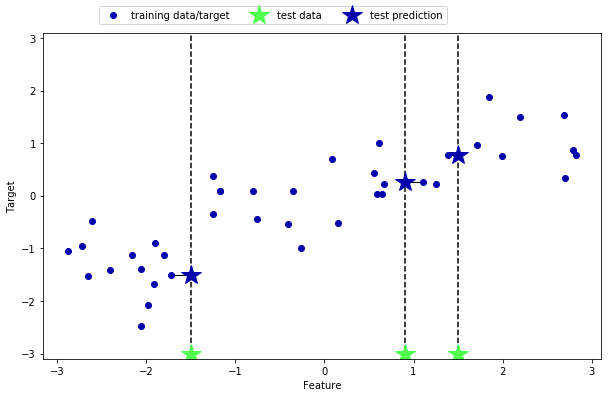

In [10]:
X,y=mglearn.datasets.make_wave(n_samples=40)
mglearn.plots.plot_knn_regression(n_neighbors=1)

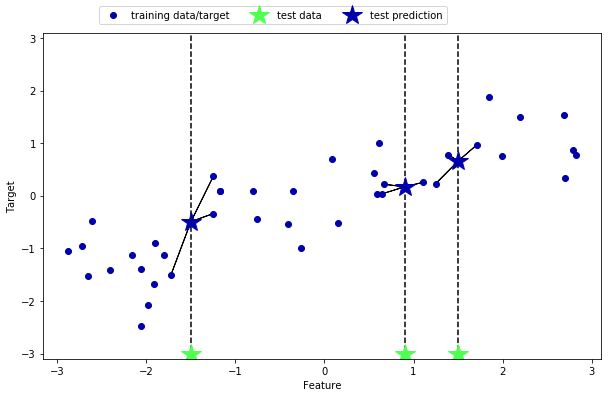

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,Y_train)
print('Test set R^2: {:.2f}'.format(reg.score(X_test,Y_test)))

Test set R^2: 0.83


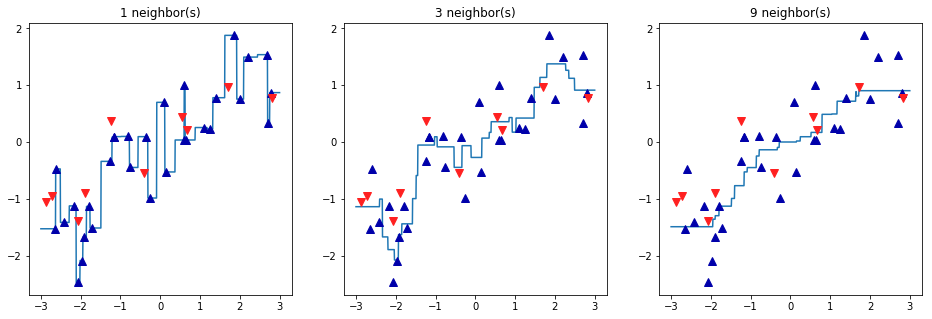

In [13]:
fig, axes = plt.subplots(1,3,figsize=(16,5))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,Y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,Y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,Y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))

## Linear Models

Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,Y_train)
print("lr_coef = {}".format(lr.coef_))
print("lr_intercept = {:.2}".format(lr.intercept_))
print('training score = {:.2f}'.format(lr.score(X_train,Y_train)))
print('test score = {:.2f}'.format(lr.score(X_test,Y_test)))

lr_coef = [0.44153666]
lr_intercept = -0.017
training score = 0.66
test score = 0.69


In [16]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,Y_train)
#print("lr_coef = {}".format(lr.coef_))
#print("lr_intercept = {:.2}".format(lr.intercept_))
print('training score = {:.2f}'.format(lr.score(X_train,Y_train)))
print('test score = {:.2f}'.format(lr.score(X_test,Y_test)))

training score = 0.95
test score = 0.61


Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(ridge.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(ridge.score(X_test,Y_test)))

Training set accuracy: 0.89
Test set accuracy: 0.75


In [18]:
ridge10 = Ridge(alpha=10).fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(ridge10.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(ridge10.score(X_test,Y_test)))

Training set accuracy: 0.79
Test set accuracy: 0.64


In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(ridge01.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(ridge01.score(X_test,Y_test)))

Training set accuracy: 0.93
Test set accuracy: 0.77


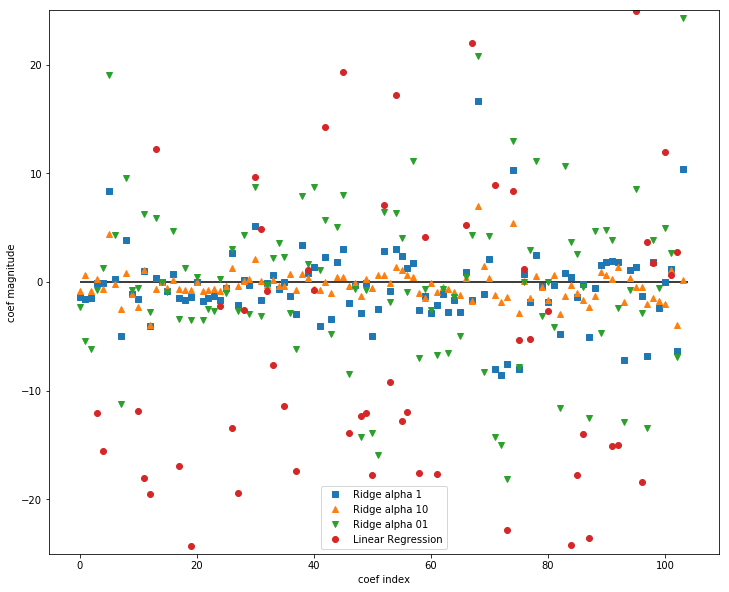

In [20]:
plt.figure(figsize=(12,10))
plt.plot(ridge.coef_,'s',label='Ridge alpha 1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha 10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha 01')
plt.plot(lr.coef_,'o',label='Linear Regression')
plt.ylabel('coef magnitude')
plt.xlabel('coef index')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

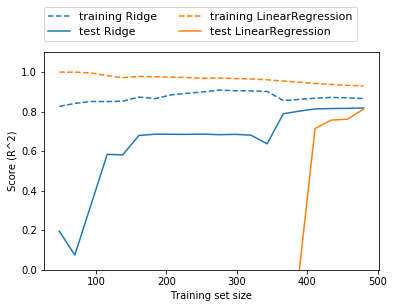

In [21]:
mglearn.plots.plot_ridge_n_samples()

Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(lasso.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(lasso.score(X_test,Y_test)))
print('No of features : {}'.format(np.sum(lasso.coef_==0)))

Training set accuracy: 0.29
Test set accuracy: 0.21
No of features : 100


In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(lasso001.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(lasso001.score(X_test,Y_test)))
print('No of features : {}'.format(np.sum(lasso001.coef_==0)))

Training set accuracy: 0.90
Test set accuracy: 0.77
No of features : 71


In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(lasso00001.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(lasso00001.score(X_test,Y_test)))
print('No of features : {}'.format(np.sum(lasso00001.coef_==0)))

Training set accuracy: 0.95
Test set accuracy: 0.64
No of features : 8


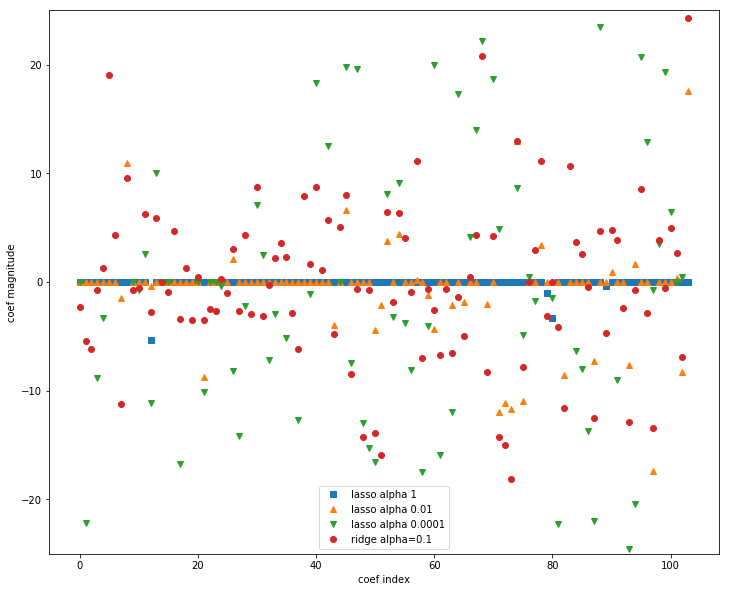

In [25]:
plt.figure(figsize=(12,10))
plt.plot(lasso.coef_,'s',label='lasso alpha 1')
plt.plot(lasso001.coef_,'^',label='lasso alpha 0.01')
plt.plot(lasso00001.coef_,'v',label='lasso alpha 0.0001')
plt.plot(ridge01.coef_,'o',label='ridge alpha=0.1')
plt.ylabel('coef magnitude')
plt.xlabel('coef index')
#plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

## Linear Classification

### logistic and linearSVC

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


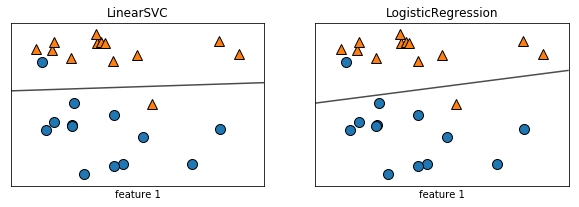

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y = mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('feature 0')
    ax.set_xlabel('feature 1')

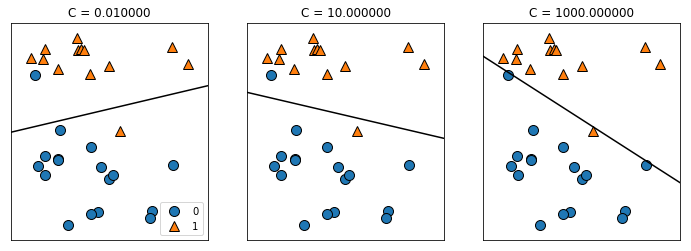

In [27]:
mglearn.plots.plot_linear_svc_regularization()

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state=0)
logreg=LogisticRegression().fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(logreg.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(logreg.score(X_test,Y_test)))

Training set accuracy: 0.96
Test set accuracy: 0.96


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
logreg100=LogisticRegression(C=100).fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(logreg100.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(logreg100.score(X_test,Y_test)))

Training set accuracy: 0.97
Test set accuracy: 0.97


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
logreg001=LogisticRegression(C=0.01).fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(logreg001.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(logreg001.score(X_test,Y_test)))

Training set accuracy: 0.93
Test set accuracy: 0.93


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


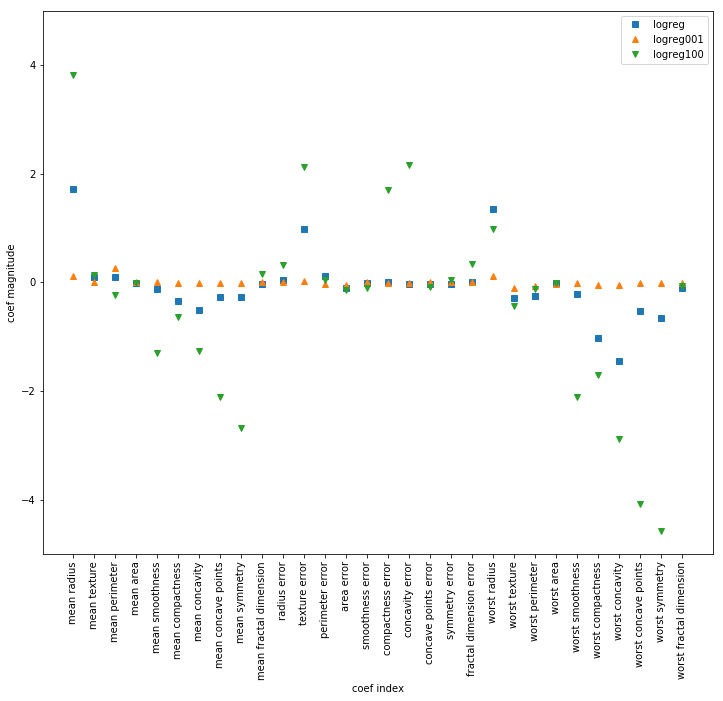

In [31]:
plt.figure(figsize=(12,10))
plt.plot(logreg.coef_.T,'s',label='logreg')
plt.plot(logreg001.coef_.T,'^',label='logreg001')
plt.plot(logreg100.coef_.T,'v',label='logreg100')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.ylabel('coef magnitude')
plt.xlabel('coef index')
#plt.hlines(0,0,len(lr.coef_))
plt.ylim(-5,5)
plt.legend()

In [32]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1').fit(X_train,Y_train)
    print('training accuracy of l1 logreg with C={:.3f}: {:.2f} '.format(C,lr_l1.score(
    X_train,Y_train)))
    print('test accuracy of l1 logreg with C={:.3f}: {:.2f} '.format(C,lr_l1.score(
    X_test,Y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accuracy of l1 logreg with C=0.001: 0.92 
test accuracy of l1 logreg with C=0.001: 0.92 
training accuracy of l1 logreg with C=1.000: 0.96 
test accuracy of l1 logreg with C=1.000: 0.96 
training accuracy of l1 logreg with C=100.000: 0.99 
test accuracy of l1 logreg with C=100.000: 0.94 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Multi class classification

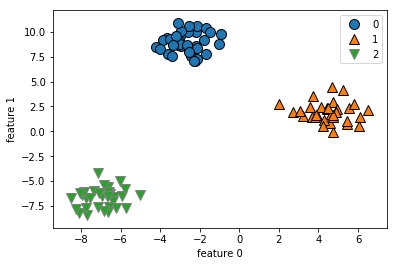

In [33]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()

In [34]:
linear_svm = LinearSVC().fit(X,y)
print('coef shape: {}'.format(linear_svm.coef_.shape))
print('intercept shape: {}'.format(linear_svm.intercept_.shape))

coef shape: (3, 2)
intercept shape: (3,)


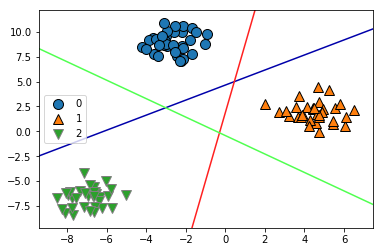

In [35]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], color=color) #doubt
plt.legend()

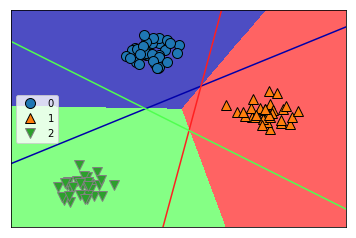

In [36]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], color=color) #doubt
plt.legend()

Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(tree.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(tree.score(X_test,Y_test)))

Training set accuracy: 1.00
Test set accuracy: 0.93


In [38]:
#applying post prining to reduce overfit to the data
tree=DecisionTreeClassifier(random_state=0,max_depth=3)
tree.fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(tree.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(tree.score(X_test,Y_test)))

Training set accuracy: 0.97
Test set accuracy: 0.96


(-1, 30)

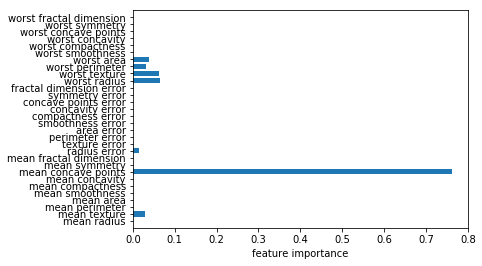

In [39]:
plt.barh(range(cancer.data.shape[1]),tree.feature_importances_,align='center')
plt.yticks(np.arange(cancer.data.shape[1]),cancer.feature_names)
plt.xlabel('feature importance')
plt.ylim(-1,cancer.data.shape[1])

Text(0, 0.5, 'price')

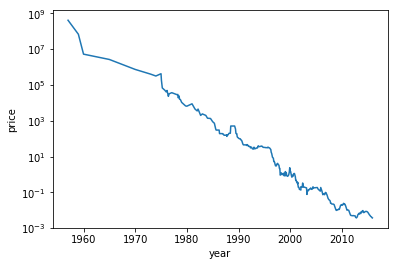

In [40]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('year')
plt.ylabel('price')

In [41]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]
X_train=data_train.date[:,np.newaxis]
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

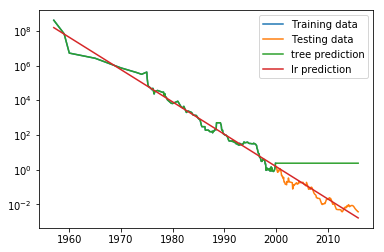

In [42]:
plt.semilogy(data_train.date,data_train.price,label='Training data')
plt.semilogy(data_test.date,data_test.price,label='Testing data')
plt.semilogy(ram_prices.date,price_tree,label='tree prediction')
plt.semilogy(ram_prices.date,price_lr,label='lr prediction')
plt.legend()


Ensemble methods

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=4)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

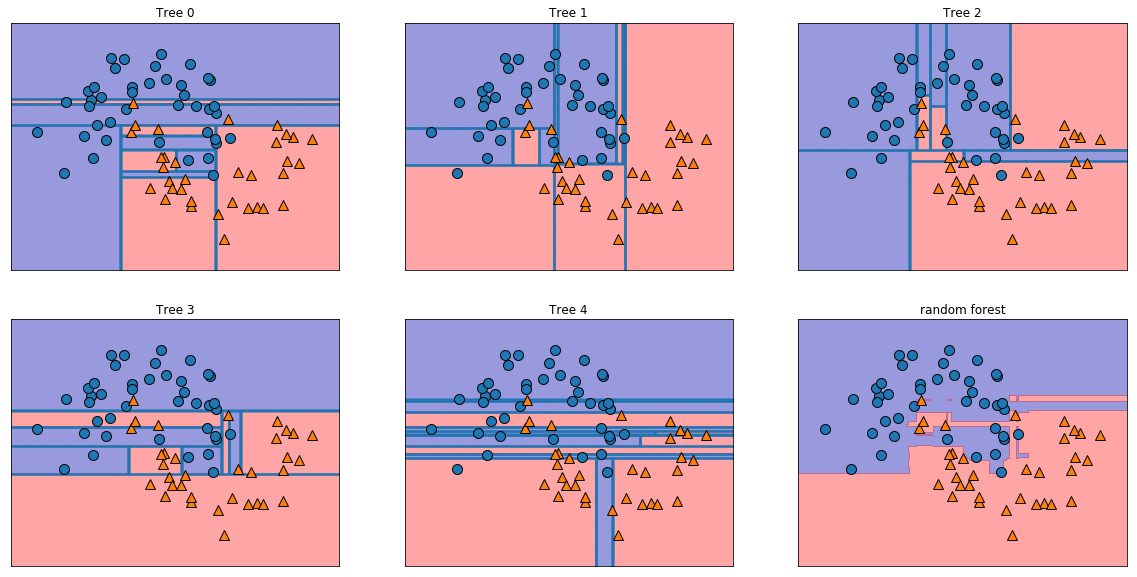

In [44]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train,Y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],
                               alpha=0.4)
axes[-1,-1].set_title('random forest')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train)

In [45]:
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state=42)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,Y_train)
print('Training set accuracy: {:.2f}'.format(forest.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(forest.score(X_test,Y_test)))

Training set accuracy: 1.00
Test set accuracy: 0.97


(-1, 30)

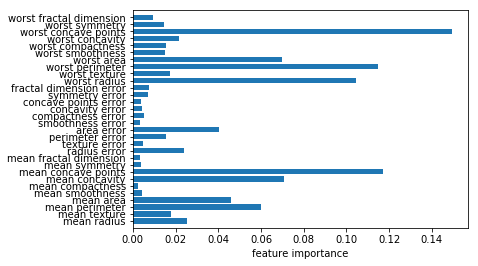

In [46]:
plt.barh(range(cancer.data.shape[1]),forest.feature_importances_,align='center')
plt.yticks(np.arange(cancer.data.shape[1]),cancer.feature_names)
plt.xlabel('feature importance')
plt.ylim(-1,cancer.data.shape[1])

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state=42)
gbrt=GradientBoostingClassifier(random_state=2)
gbrt.fit(X_train,Y_train)

print('Training set accuracy: {:.2f}'.format(gbrt.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(gbrt.score(X_test,Y_test)))

Training set accuracy: 1.00
Test set accuracy: 0.96


In [48]:
gbrt=GradientBoostingClassifier(random_state=2,max_depth=1)
gbrt.fit(X_train,Y_train)

print('Training set accuracy: {:.2f}'.format(gbrt.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(gbrt.score(X_test,Y_test)))

Training set accuracy: 0.99
Test set accuracy: 0.97


In [49]:
gbrt=GradientBoostingClassifier(random_state=2,learning_rate=0.01)
gbrt.fit(X_train,Y_train)

print('Training set accuracy: {:.2f}'.format(gbrt.score(X_train,Y_train)))
print('Test set accuracy: {:.2f}'.format(gbrt.score(X_test,Y_test)))

Training set accuracy: 0.99
Test set accuracy: 0.96


(-1, 30)

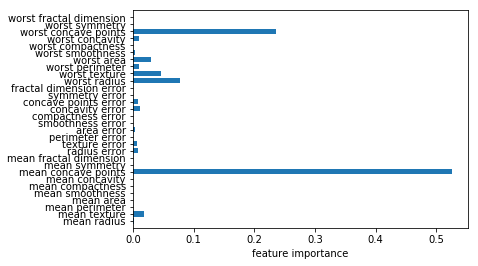

In [50]:
plt.barh(range(cancer.data.shape[1]),gbrt.feature_importances_,align='center')
plt.yticks(np.arange(cancer.data.shape[1]),cancer.feature_names)
plt.xlabel('feature importance')
plt.ylim(-1,cancer.data.shape[1])

## Support Vector Machine

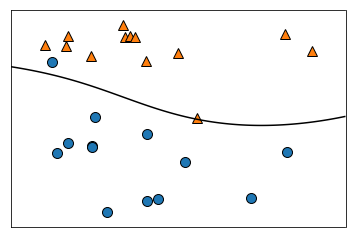

In [53]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

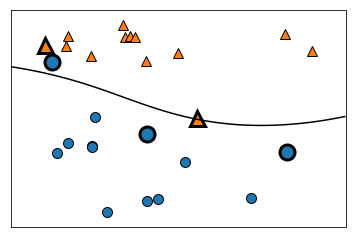

In [64]:
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)

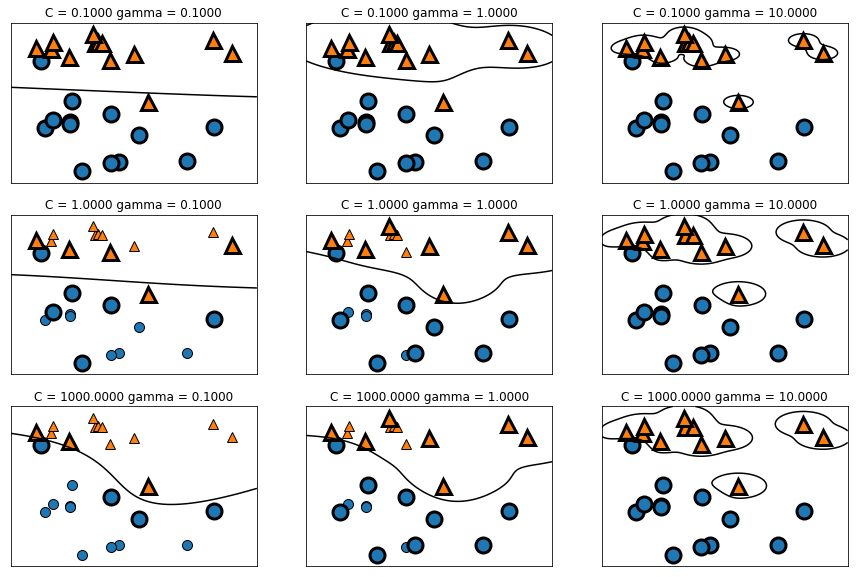

In [66]:
fig,axes=plt.subplots(3,3,figsize=(15,10
                                  ))
for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)

array([False, False, False,  True,  True])